<a href="https://colab.research.google.com/github/Saumitra-Shukla/MNIST_number_GAN/blob/master/Mnist_number_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!mkdir -p images

In [0]:
!ls

In [0]:
!pip install tf-nightly-gpu-2.0-preview

In [0]:
!pip install --upgrade tensorflow

In [4]:
import tensorflow as tf
from keras.datasets import mnist
from keras.layers import Input,Dense,Reshape,Flatten,Dropout
from keras.layers import BatchNormalization,Activation,ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential,Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import sys
import numpy as np


Using TensorFlow backend.


In [0]:
img_rows=28
img_cols=28
channels=1
latent_dim=100
img_shape=(img_rows,img_cols,channels)

In [0]:
def build_generator():
  
  model=Sequential()
  
  model.add(Dense(128*7*7,activation='relu',input_dim=latent_dim))
  model.add(Reshape((7,7,128)))
  model.add(UpSampling2D())
  model.add(Conv2D(128,kernel_size=3,padding='same'))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Activation('relu'))
  model.add(UpSampling2D())
  model.add(Conv2D(64,kernel_size=3,padding='same'))
  model.add(BatchNormalization(momentum=0.8))
  model.add(Activation("relu"))
  model.add(Conv2D(channels, kernel_size=3, padding="same"))
  model.add(Activation('tanh'))
  
  model.summary() 
  
  noise=Input(shape=(latent_dim,))
  img=model(noise)
  return Model(noise, img)
  
  
  
  
  
  
  
  

In [0]:
def build_discriminator():
  
  model=Sequential()
  
  model.add(Conv2D(32,kernel_size=3,strides=2,input_shape=img_shape,padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(64,kernel_size=3,strides=2,padding='same'))
  model.add(ZeroPadding2D(padding=((0,1),(0,1))))
  model.add(BatchNormalization(momentum=0.8))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(128,kernel_size=3,strides=2,padding='same'))
 # model.add(ZeroPadding2D(padding((0,1),(0,1))))
  model.add(BatchNormalization(momentum=0.8))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(256,kernel_size=3,strides=1,padding='same'))
  #model.add(ZeroPadding2D(padding((0,1),(0,1))))
  model.add(BatchNormalization(momentum=0.8))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Dropout(0.25))
  
  model.add(Flatten())
  model.add(Dense(1,activation='sigmoid'))
  
  model.summary()
  
  img=Input(shape=img_shape)
  validity=model(img)
  
  return Model(img,validity)


In [8]:
optimizer=Adam(0.0002,0.5)

#build and compile discriminator

discriminatorr= build_discriminator()
discriminatorr.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

#build generator

generatorr=build_generator()

#generator takes the noise as input and generate imgs

z=Input(shape=(latent_dim,))
img=generatorr(z)

#for the combined model we only generate images as inp and determines validity
discriminatorr.trainanble=False

#discriminator takes generated img and gives validity

valid=discriminatorr(img)

#trains the generator to fool discriminator
combined=Model(z,valid)
combined.compile(loss='binary_crossentropy',optimizer=optimizer)

W0616 07:22:57.281707 140689518065536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0616 07:22:57.283724 140689518065536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0616 07:22:57.291237 140689518065536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0616 07:22:57.344608 140689518065536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0616 07:22:57.355427 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 14, 14, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
zero_padding2d_1 (ZeroPaddin (None, 8, 8, 64)          0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 64)          256       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 8, 8, 64)          0         
__________

W0616 07:22:58.439380 140689518065536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0616 07:22:58.449338 140689518065536 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0616 07:22:58.489615 140689518065536 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:2018: The name tf.image.resize_nearest_neighbor is deprecated. Please use tf.compat.v1.image.resize_nearest_neighbor instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 6272)              633472    
_________________________________________________________________
reshape_1 (Reshape)          (None, 7, 7, 128)         0         
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 128)       147584    
_________________________________________________________________
batch_normalization_4 (Batch (None, 14, 14, 128)       512       
_________________________________________________________________
activation_1 (Activation)    (None, 14, 14, 128)       0         
_________________________________________________________________
up_sampling2d_2 (UpSampling2 (None, 28, 28, 128)       0         
__________

In [0]:
def save_imgs(epoch):
  r,c=5,5
  noise=np.random.normal(0,1,(r*c,latent_dim))
  gen_imgs=generatorr.predict(noise)
  
  #rescale img  0-1
  gen_imgs=0.5*gen_imgs+0.5
  
  fig,axs=plt.subplots(r,c)
  cnt=0
  for i in range(r):
    for j in range(c):
      axs[i,j].imshow(gen_imgs[cnt,:,:,0],cmap='gray')
      axs[i,j].axis('off')
      cnt=cnt+1
  fig.savefig("images/mnist_%d.png"%epoch)
  plt.close()      

In [0]:
def train(epochs,batch_size=128,save_interval=50):
  
  #load the dataset
  (x_train,_),(_,_)=mnist.load_data()
  
  x_train=(2*x_train)/255.0
  x_train=np.expand_dims(x_train,axis=3)
  
  #ground truths
  
  valid=np.ones((batch_size,1))
  fake=np.zeros((batch_size,1))
  
  for epoch in range(epochs):
    
    #---------------------
    # Train discriminator
    #---------------------
    
    #select a random half of imgs
    idx=np.random.randint(0,x_train.shape[0],batch_size)
    imgs=x_train[idx]
    
    #sample noise and new img generation
    noise=np.random.normal(0,1,(batch_size,latent_dim))
    gen_imgs=generatorr.predict(noise)
    
    #train discriminator : real as 1 and fake as 0
    d_loss_real=discriminatorr.train_on_batch(imgs,valid)
    d_loss_fake=discriminatorr.train_on_batch(gen_imgs,fake)
    d_loss=0.5*np.add(d_loss_real,d_loss_fake)
    
    #-----------------
    # Train generator
    #-----------------
    
    #train generator
    g_loss=combined.train_on_batch(noise,valid)
    
    #plot the progress
    print("%d [D loss: %f, acc : %.2f%%] [G loss ; %f]"
         % (epoch,d_loss[0],100*d_loss[1],g_loss))
    
    
    #save interval for saved images
    if epoch % save_interval == 0:
      save_imgs(epoch)
      

In [20]:
train(epochs=4000, batch_size=32,save_interval=500)

0 [D loss: 1.139349, acc : 50.00%] [G loss ; 0.407095]
1 [D loss: 0.979879, acc : 51.56%] [G loss ; 0.766077]
2 [D loss: 1.023606, acc : 51.56%] [G loss ; 0.661057]
3 [D loss: 1.019454, acc : 51.56%] [G loss ; 0.689141]
4 [D loss: 1.238315, acc : 50.00%] [G loss ; 0.536085]
5 [D loss: 1.127843, acc : 51.56%] [G loss ; 0.554723]
6 [D loss: 1.223678, acc : 51.56%] [G loss ; 0.488410]
7 [D loss: 1.160933, acc : 50.00%] [G loss ; 0.596772]
8 [D loss: 1.243761, acc : 50.00%] [G loss ; 0.658656]
9 [D loss: 1.210571, acc : 51.56%] [G loss ; 0.625814]
10 [D loss: 1.108285, acc : 50.00%] [G loss ; 0.745758]
11 [D loss: 0.980445, acc : 53.12%] [G loss ; 0.755758]
12 [D loss: 1.089152, acc : 51.56%] [G loss ; 0.652997]
13 [D loss: 1.161305, acc : 50.00%] [G loss ; 0.668484]
14 [D loss: 1.174454, acc : 50.00%] [G loss ; 0.665219]
15 [D loss: 1.152399, acc : 53.12%] [G loss ; 0.559966]
16 [D loss: 1.196000, acc : 50.00%] [G loss ; 0.452323]
17 [D loss: 1.225164, acc : 51.56%] [G loss ; 0.395301]
18

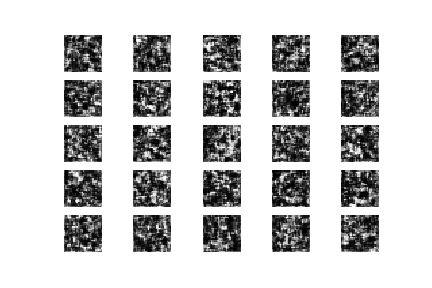

In [21]:
from IPython.display import display
from PIL import Image

path="images/mnist_0.png"
display(Image.open(path))

In [23]:
!ls images/

mnist_0.png	mnist_1500.png	mnist_2500.png	mnist_3500.png
mnist_1000.png	mnist_2000.png	mnist_3000.png	mnist_500.png


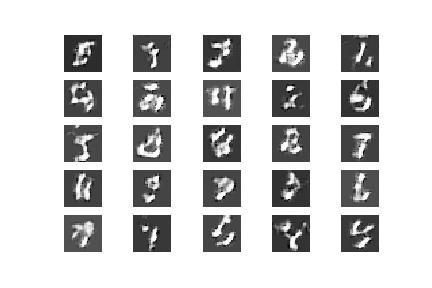

In [26]:
path="images/mnist_3500.png"
display(Image.open(path))